In [ ]:
#PROYECTO: ENDEUDAMIENTO CREDITICIO


In [1]:
# Cargar Librerias correspondientes:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Cargar datos de CSV: endeudamiento_crediticio
df = pd.read_csv("endeudamiento_crediticio.csv", sep = ";",encoding = 'latin1')

In [3]:
df.info()
#Se observan valores faltantes en las columnas:
#Mto_ingreso_mensual 29.731 valores en falta
#Nro_dependiente 3.924 valores en falta

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          150000 non-null  int64  
 1   Default                     150000 non-null  int64  
 2   Prct_uso_tc                 150000 non-null  float64
 3   Edad                        150000 non-null  int64  
 4   Nro_prestao_retrasados      150000 non-null  int64  
 5   Prct_deuda_vs_ingresos      150000 non-null  float64
 6   Mto_ingreso_mensual         120269 non-null  float64
 7   Nro_prod_financieros_deuda  150000 non-null  int64  
 8   Nro_retraso_60dias          150000 non-null  int64  
 9   Nro_creditos_hipotecarios   150000 non-null  int64  
 10  Nro_retraso_ultm3anios      150000 non-null  int64  
 11  Nro_dependiente             146076 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [4]:
#Dando una revisión general a los valores en cada columna
df.head(10)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [5]:
# Y a la parte final (tail) de nuestro df
df.tail(10)

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
149990,149991,0,0.055518,46,0,0.609779,4335.0,7,0,1,0,2.0
149991,149992,0,0.104112,59,0,0.477658,10316.0,10,0,2,0,0.0
149992,149993,0,0.871976,50,0,4132.000000,NaN,11,0,1,0,3.0
149993,149994,0,1.000000,22,0,0.000000,820.0,1,0,0,0,0.0
149994,149995,0,0.385742,50,0,0.404293,3400.0,7,0,0,0,0.0
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0
149999,150000,0,0.850283,64,0,0.249908,8158.0,8,0,2,0,0.0


In [6]:
#Realizando la estadística descriptiva inicial
df.describe()

,ID,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Se realizan las siguientes observaciones:
*   Nuestra columna objetivo es la columna '**Default**'
*   Para la columna **Prct_uso_tc**: La presencia de un valor mínimo de 0 y un valor máximo de 50708 sugiere una amplia gama de niveles de uso de la tarjeta de crédito. El valor máximo puede ser un valor atípico o un dato erróneo, ya que es significativamente mayor que el percentil 75.
*   Para la columna **Edad**: Las edades 0 y 109 pueden representar valores outliers o erróneos.
*   Columna **Nro_prestao_retrasados**: El valor máximo es 98, lo cual es bastante alto y puede indicar la presencia de valores atípicos o errores en los datos.
* Columna **Prct_deuda_vs_ingresos**:La media de 353.005 indica que, en promedio, la deuda de los clientes es aproximadamente 353 veces mayor que sus ingresos.  El valor máximo es 329664, lo cual es bastante alto y podría indicar outliers.
* Columna **Mto_ingreso_mensual**: el ingreso mensual promedio de los clientes es de aproximadamente 120,260. El valor mínimo es 14,384 lo que indica el ingreso mensual más bajo observado en el conjunto de datos.
El valor máximo es 3,008,750 lo cual es bastante alto y puede tratarse de un valor outlier. Los percentiles al 25%, 50% y 75% son 3400, 5400 y 8249 respectivamente. Esto sugiere que la mayoría de los clientes tienen ingresos mensuales relativamente bajos, pero hay algunos clientes con ingresos mucho más altos.
* Columna **Nro_prod_financieros_deuda**: los clientes tienen alrededor de 8 o 9 productos financieros en deuda.El valor máximo de 58 nos da indicios de un valor erróneo o outliers.
* Columna **Nro_retraso_60dias**: columna por analizar
* Columna **Nro_creditos_hipotecarios**: Los clientes tienen alrededor de 1 crédito hipotecario. El valor máximo de 54 puede indicar un valor erróneo o outliers.
*   Columna **Nro_retraso_ultm3anios**: columna por analizar
*   Columna **Nro_dependiente**: Valor máximo de 20 personas dependientes, es un dato atípico (muy alto)















In [7]:
#Realizando un análisis de las columnas Nro_retraso_60dias y Nro_retraso_ultm3anios
#para comprobación de que sean datos categóricos y la distribución de los datos en estas columnas
# Verificar valores únicos
unique_values_60dias = df['Nro_retraso_60dias'].nunique()
unique_values_ultm3anios = df['Nro_retraso_ultm3anios'].nunique()

print("Valores únicos en Nro_retraso_60dias:", unique_values_60dias)
print("Valores únicos en Nro_retraso_ultm3anios:", unique_values_ultm3anios)

# Distribución de valores
value_counts_60dias = df['Nro_retraso_60dias'].value_counts()
value_counts_ultm3anios = df['Nro_retraso_ultm3anios'].value_counts()

print("Distribución de valores en Nro_retraso_60dias:")
print(value_counts_60dias)

print("Distribución de valores en Nro_retraso_ultm3anios:")
print(value_counts_ultm3anios)


Valores únicos en Nro_retraso_60dias: 19
Valores únicos en Nro_retraso_ultm3anios: 13
Distribución de valores en Nro_retraso_60dias:
0     141662
1       5243
2       1555
3        667
4        291
98       264
5        131
6         80
7         38
8         21
9         19
10         8
96         5
11         5
13         4
15         2
14         2
12         2
17         1
Name: Nro_retraso_60dias, dtype: int64
Distribución de valores en Nro_retraso_ultm3anios:
0     142396
1       5731
2       1118
3        318
98       264
4        105
5         34
6         16
7          9
96         5
8          2
11         1
9          1
Name: Nro_retraso_ultm3anios, dtype: int64


Para **Nro_retraso_ultm3anios**: no es una columna categórica, los clientes tienen en promedio 0.24 retrasos de pago en los últimos 3 años. (poca cantidad de retrasos). La presencia de 264 valores de 98 y 5 de 96 se consideran outliers.
Para **Nro_retraso_60dias**: La presencia de 264 valores de 98 y 5 de 96 se consideran outliers.

In [ ]:
#PUNTO 1: PRIMER ENTENDIMIENTO DE LOS DATOS; 5 insights iniciales relevantes
#Para comparación sin preprocesar la data.
#Realizando un primer EDA con la librería Sweetviz con relación a mi variable objetivo: Default
!pip install sweetviz
import sweetviz as sv
my_report = sv.analyze(df, target_feat='Default')
my_report.show_html()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 29.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
#Eliminando la columna ID para que no sea tomada en cuenta en los cálculos de correlación
df = df.drop(columns=['ID'])

In [10]:
df.head()

,Default,Prct_uso_tc,Edad,Nro_prestao_retrasados,Prct_deuda_vs_ingresos,Mto_ingreso_mensual,Nro_prod_financieros_deuda,Nro_retraso_60dias,Nro_creditos_hipotecarios,Nro_retraso_ultm3anios,Nro_dependiente
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


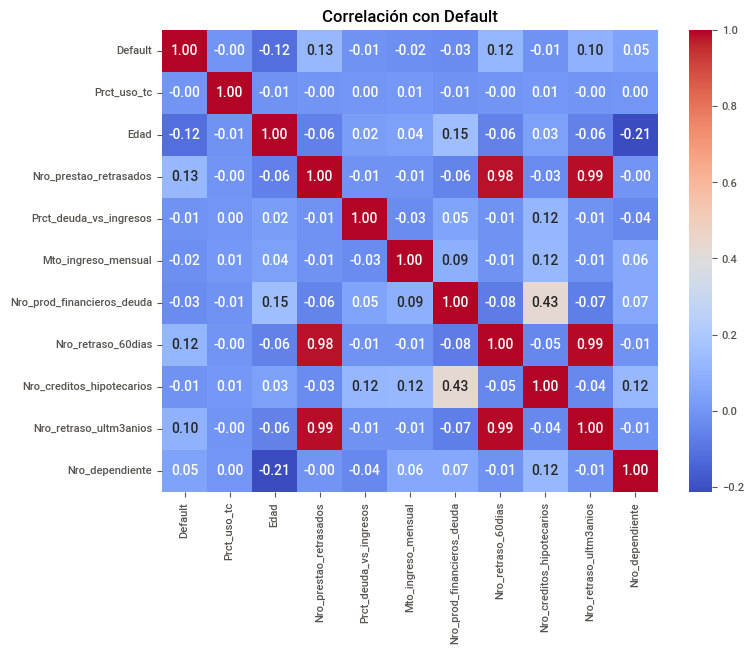

Default                       1.000000
Nro_prestao_retrasados        0.125587
Nro_retraso_60dias            0.117175
Nro_retraso_ultm3anios        0.102261
Nro_dependiente               0.046048
Prct_uso_tc                  -0.001802
Nro_creditos_hipotecarios    -0.007038
Prct_deuda_vs_ingresos       -0.007602
Mto_ingreso_mensual          -0.019746
Nro_prod_financieros_deuda   -0.029669
Edad                         -0.115386
Name: Default, dtype: float64


In [ ]:
#Calculando la correlación entre mi variable objetivo 'Default' y mis otras variables
#Usando un mapa de correlación
#usando la función .corr

correlation_matrix = df.corr()
# Creando el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación con Default')
plt.show()

correlation_with_default = df.corr()['Default'].sort_values(ascending=False)
print(correlation_with_default)


Se puede observar que las variables con mayor influencia en nuestra variable objetivo 'Default' son:

**Variables con correlación positiva:**

Las variables "Nro_prestao_retrasados", "Nro_retraso_60dias" y "Nro_retraso_ultm3anios" y "Nro_dependiente" tienen correlaciones positivas.

**Variables con correlación negativa:**

La variable "Edad" también tiene una correlación negativa, aunque no tan fuerte como las anteriores (las de correlación positiva).

Las variables "Nro_prod_financieros_deuda" y "Mto_ingreso_mensual" tienen correlaciones negativas.

**Variables con correlación cercana a cero:**

Las variables "Prct_uso_tc" y "Nro_creditos_hipotecarios" y "Prct_deuda_vs_ingresos" tienen correlaciones muy cercanas a cero, lo que sugiere una relación débil o prácticamente inexistente entre estas variables y la probabilidad de incumplimiento.

**Analizando a fondo la correlación de nuestra variable objetivo con las variables con las que tiene una correlación fuerte positiva y negativa.**

In [17]:
# Filtrar el DataFrame para incluir solo clientes con préstamos retrasados
clientes_con_retrasos = df[df['Nro_prestao_retrasados'] > 0]

# Calcular la proporción de clientes con préstamos retrasados que están en incumplimiento
proporcion_incumplimiento = clientes_con_retrasos['Default'].mean()

print("Proporción de clientes con préstamos retrasados que están en incumplimiento:", proporcion_incumplimiento)

Proporción de clientes con préstamos retrasados que están en incumplimiento: 0.20786423150696356


In [18]:
# Filtrar el DataFrame para incluir solo clientes con préstamos retrasados por más de 60 días
clientes_con_retrasos_60dias = df[df['Nro_retraso_60dias'] > 0]

# Calcular la proporción de clientes con préstamos retrasados que están en incumplimiento
proporcion_incumplimiento = clientes_con_retrasos_60dias['Default'].mean()

print("Proporción de clientes con préstamos retrasados por más de 60 días que están en incumplimiento:", proporcion_incumplimiento)

Proporción de clientes con préstamos retrasados por más de 60 días que están en incumplimiento: 0.4164068121851763


In [19]:
# Filtrar el DataFrame para incluir solo clientes con préstamos retrasados por más de 3 años
clientes_con_retrasos_3anios = df[df['Nro_retraso_ultm3anios'] > 0]

# Calcular la proporción de clientes con préstamos retrasados que están en incumplimiento
proporcion_incumplimiento = clientes_con_retrasos_3anios['Default'].mean()

print("Proporción de clientes con préstamos retrasados por más de 3 años que están en incumplimiento:", proporcion_incumplimiento)

Proporción de clientes con préstamos retrasados por más de 3 años que están en incumplimiento: 0.364281956864808


In [20]:
#Analizando rangos de edad para saber entre cuál rango se encuentra la tasa más alta de incumplimiento
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']

# Agrega una columna al DataFrame que indique el grupo de edad al que pertenece cada cliente
df['Grupo_Edad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=False)

# Calcula la tasa de incumplimiento para cada grupo de edad
tasa_incumplimiento_por_edad = df.groupby('Grupo_Edad')['Default'].mean()

# Muestra los resultados
print(tasa_incumplimiento_por_edad)

Grupo_Edad
18-29    0.117347
30-39    0.100720
40-49    0.083719
50-59    0.064531
60+      0.036326
Name: Default, dtype: float64


In [21]:
# Calcular la tasa de incumplimiento promedio para cada grupo de clientes según el número de dependientes
bins = [0, 1, 3, 5, 7, 10, 15, 20]
labels = ['0', '1', '2-3', '4-5', '6-7', '8-10', '11+']

# Agregar una columna al DataFrame que indique el grupo según el número de dependientes
df['Grupo_dependientes'] = pd.cut(df['Nro_dependiente'], bins=bins, labels=labels, right=False)

# Calcular la tasa de incumplimiento promedio para cada grupo de dependientes
tasa_incumplimiento_por_dependientes = df.groupby('Grupo_dependientes')['Default'].mean()

# Imprimir los resultados
print(tasa_incumplimiento_por_dependientes)


Grupo_dependientes
0       0.058629
1       0.076770
2-3     0.091859
4-5     0.101770
6-7     0.087500
8-10    0.000000
11+          NaN
Name: Default, dtype: float64


In [22]:
#dividiendo el ingreso mensual en categorías y calculando la tasa de incumplimiento para cada categoría.
# Definir los límites de las categorías de ingreso mensual
income_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, float('inf')]
income_labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20001-25000', '25001-30000', '30001+']

# Crear una nueva columna que indique la categoría de ingreso mensual para cada cliente
df['Income_Category'] = pd.cut(df['Mto_ingreso_mensual'], bins=income_bins, labels=income_labels, right=False)

# Calcular la tasa de incumplimiento para cada categoría de ingreso mensual
default_rate_by_income = df.groupby('Income_Category')['Default'].mean()

# Imprimir los resultados
print(default_rate_by_income)


Income_Category
0-5000         0.087567
5001-10000     0.060171
10001-15000    0.041986
15001-20000    0.042604
20001-25000    0.052012
25001-30000    0.053812
30001+         0.050926
Name: Default, dtype: float64


In [23]:
#Calcular el número promedio de productos financieros en deuda para cada grupo de edad

promedio_productos_por_edad = df.groupby('Grupo_Edad')['Nro_prod_financieros_deuda'].mean()

# Visualizar los resultados
print(promedio_productos_por_edad)

Grupo_Edad
18-29    4.401814
30-39    7.247380
40-49    8.512436
50-59    9.543667
60+      9.473102
Name: Nro_prod_financieros_deuda, dtype: float64


**Insights:**
1.  A medida que aumenta la edad, la tasa de incumplimiento disminuye significativamente. Las personas jóvenes tienden a una mayor propensión al incumplimiento en comparación con los clientes mayores. El grupo de edad de 18 a 29 años tiene la tasa de incumplimiento más alta (aproximadamente 11.73%)
2. Los clientes sin dependientes (Nro_dependiente = 0) tienen la tasa de incumplimiento más baja, mientras que aquellos con un mayor número de dependientes tienden a tener tasas de incumplimiento más altas.
3. La proporción de clientes con préstamos retrasados que están en incumplimiento es del 20.79%. Esto significa que aproximadamente uno de cada cinco clientes con préstamos retrasados incumple.
4. Cuando el retraso en los pagos es más prolongado, la proporción de incumplimiento tiende a aumentar significativamente, al 41.64%.
5. La tasa de incumplimiento aumenta a medida que disminuye el ingreso mensual, con la tasa más alta entre aquellos con ingresos de 0 a 5000. Sin embargo, esta tendencia no es necesariamente lineal, ya que hay algunas fluctuaciones en las tasas de incumplimiento en las categorías intermedias de ingresos.
6. Existe una relación lineal entre la cantidad de productos financieros y la edad: A medida que aumenta la edad, el número promedio de productos financieros en deuda tiende a aumentar. Esto puede sugerir que a medida que las personas envejecen, tienden a acumular más productos financieros en deuda, lo que podría indicar una mayor complejidad en su situación financiera o una mayor disposición a asumir deuda.



**TRATAMIENTO DE DATOS: PREPROCESAMIENTO DE DATOS. Verificando la cantidad de valores 0 y NULL por cada columna**

In [24]:
# Verificar si hay valores 0 en todas las columnas excepto 'Default'
valores_cero = (df.drop(columns=['Default']) == 0).sum()
print("Valores 0 por columna (excepto 'Default'):")
print(valores_cero[valores_cero > 0])

# Verificar si hay valores NULL en todas las columnas excepto 'Default'
valores_nulos = df.drop(columns=['Default']).isnull().sum()
print("\nValores NULL por columna (excepto 'Default'):")
print(valores_nulos[valores_nulos > 0])

Valores 0 por columna (excepto 'Default'):
Prct_uso_tc                    10878
Edad                               1
Nro_prestao_retrasados        126018
Prct_deuda_vs_ingresos          4113
Mto_ingreso_mensual             1634
Nro_prod_financieros_deuda      1888
Nro_retraso_60dias            141662
Nro_creditos_hipotecarios      56188
Nro_retraso_ultm3anios        142396
Nro_dependiente                86902
dtype: int64

Valores NULL por columna (excepto 'Default'):
Mto_ingreso_mensual    29731
Nro_dependiente         3924
Grupo_Edad             19414
Grupo_dependientes      3925
Income_Category        29731
dtype: int64


In [25]:
# Calculando el procentaje de valores cero y NULL para tener una idea clara
# de la magnitud de los datos en falta

#Total de filas en el DataFrame
total_filas = len(df)

# Calcular el porcentaje de valores cero para cada columna
porcentaje_cero = (valores_cero / total_filas) * 100

print("Porcentaje de valores cero por columna (excepto 'Default'):")
print(porcentaje_cero)


Porcentaje de valores cero por columna (excepto 'Default'):
Prct_uso_tc                    7.252000
Edad                           0.000667
Nro_prestao_retrasados        84.012000
Prct_deuda_vs_ingresos         2.742000
Mto_ingreso_mensual            1.089333
Nro_prod_financieros_deuda     1.258667
Nro_retraso_60dias            94.441333
Nro_creditos_hipotecarios     37.458667
Nro_retraso_ultm3anios        94.930667
Nro_dependiente               57.934667
Grupo_Edad                     0.000000
Grupo_dependientes             0.000000
Income_Category                0.000000
dtype: float64


Observamos columnas con un altísimo porcentaje de valores ceros: Nro_retraso_60dias' y 'Nro_retraso_ultm3anios': Tienen alrededor del 94.44% y 94.93% de valores cero, respectivamente. Estos altos porcentajes de ceros sugieren que la mayoría de los clientes no han experimentado retrasos significativos en los últimos 60 días o en los últimos 3 años.
Columnas a eliminar (>10%):
*  Nro_prestao_retrasados
*  Nro_retraso_60dias
*  Nro_creditos_hipotecarios
*  Nro_retraso_ultm3anios
*  Nro_dependientes



In [26]:
# Calcular el porcentaje de valores NULL para cada columna
porcentaje_nulos = (valores_nulos / total_filas) * 100

print("\nPorcentaje de valores NULL por columna (excepto 'Default'):")
print(porcentaje_nulos)



Porcentaje de valores NULL por columna (excepto 'Default'):
Prct_uso_tc                    0.000000
Edad                           0.000000
Nro_prestao_retrasados         0.000000
Prct_deuda_vs_ingresos         0.000000
Mto_ingreso_mensual           19.820667
Nro_prod_financieros_deuda     0.000000
Nro_retraso_60dias             0.000000
Nro_creditos_hipotecarios      0.000000
Nro_retraso_ultm3anios         0.000000
Nro_dependiente                2.616000
Grupo_Edad                    12.942667
Grupo_dependientes             2.616667
Income_Category               19.820667
dtype: float64


En el caso de las columnas con valores NULL, se eliminarán las columnas:
* Mto_ingreso_mensual
* Grupo_Edad
* Income_Category



In [27]:
# Eliminar columnas con un alto porcentaje de valores cero y NULL:
columnas_eliminar = ['Nro_retraso_60dias', 'Nro_retraso_ultm3anios','Nro_prestao_retrasados', 'Nro_creditos_hipotecarios',
                      'Nro_dependiente', 'Mto_ingreso_mensual', 'Grupo_Edad', 'Grupo_dependientes', 'Income_Category']
df_nuevo = df.drop(columns=columnas_eliminar)

df_nuevo.head()


,Default,Prct_uso_tc,Edad,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda
0,1,0.766127,45,0.802982,13
1,0,0.957151,40,0.121876,4
2,0,0.658180,38,0.085113,2
3,0,0.233810,30,0.036050,5
4,0,0.907239,49,0.024926,7


In [30]:
# Calcular el valor medio y la desviación estándar de cada columna seleccionada
mean_values = df_nuevo.mean()
std_values = df_nuevo.std()

# Definir el nivel de confianza para el intervalo (95%)
nivel_IC = 0.95

# Calcular el tamaño del intervalo de confianza
z_score = 1.96  # Para un nivel de confianza del 95%
interval_size = z_score * (std_values / np.sqrt(len(df_nuevo)))

# Imputar valores faltantes utilizando un valor aleatorio dentro del intervalo de confianza
for column in df_nuevo.columns:
    missing_values = df_nuevo[column].isnull()
    mean = mean_values[column]
    interval = interval_size[column]
    lower_bound = mean - interval
    upper_bound = mean + interval
    imputed_values = np.random.uniform(lower_bound, upper_bound, size=missing_values.sum())
    df_nuevo.loc[missing_values, column] = imputed_values

In [32]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Default                     150000 non-null  int64  
 1   Prct_uso_tc                 150000 non-null  float64
 2   Edad                        150000 non-null  int64  
 3   Prct_deuda_vs_ingresos      150000 non-null  float64
 4   Nro_prod_financieros_deuda  150000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 5.7 MB


In [33]:
#TRATAMIENTO DE OUTLIERS: identificación, tratamiento
#Paso 1: Identificación de outliers en las columnas df_nuevo

def identificar_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers = column[(column < lower_limit) | (column > upper_limit)]
    return outliers

# Identificar outliers en cada columna excepto 'Default'
outliers_dict = {}
for col in df_nuevo.columns:
    if col != 'Default':  # Excluir la columna 'Default'
        outliers_dict[col] = identificar_outliers_iqr(df_nuevo[col])

# Mostrar los outliers identificados
for col, outliers in outliers_dict.items():
    print("Outliers en la columna '{}':".format(col))
    print(outliers)



Outliers en la columna 'Prct_uso_tc':
226           1.953488
293        2340.000000
697        2066.000000
900           2.258964
919           1.362142
              ...     
149245      771.000000
149279    20514.000000
149663        1.744511
149778        1.383886
149927        3.603566
Name: Prct_uso_tc, Length: 763, dtype: float64
Outliers en la columna 'Edad':
436        97
2922       99
7763      101
9359       97
9870       98
11854      98
12852      97
18759      97
19884     103
24007      99
25561     102
28870      97
39136      97
39704      97
39846      99
40007     107
41127      97
48964      97
51701      98
56761     105
57526      99
57967     103
59392      99
65695       0
66650      97
78707      99
87211      99
90937     102
91970      98
92718      99
93813     101
96450     102
100339     97
105790    109
106912     99
108364     98
110604     97
111408     97
116129    101
118163     97
126050     97
135025    103
136327     97
138291    109
142764     98
1

In [37]:
# Función para imputar outliers topeando el percentil
def imputar_outliers_percentil(column, percentil=95):
    upper_limit = np.percentile(column, percentil)
    column[column > upper_limit] = upper_limit
    return column

# Imputar outliers para cada columna
for col, outliers in outliers_dict.items():
    if not outliers.empty:
        df_nuevo[col] = imputar_outliers_percentil(df_nuevo[col])


<ipython-input-37-eb80a45488b3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > upper_limit] = upper_limit


In [ ]:
#Imputando topeando el percentil
def topear_outliers_percentil(column, percentil=95):
    upper_limit = np.percentile(column, percentil)
    column[column > upper_limit] = upper_limit
    return column

# Copiar el DataFrame sin la columna 'Default'
df_imputed_sin_default = df_nuevo.drop(columns=['Default'])

# Imputar outliers topeando el percentil en cada columna
for col in df_imputed_sin_default.columns:
    df_imputed_sin_default[col] = topear_outliers_percentil(df_imputed_sin_default[col])

# Mostrar el DataFrame con los outliers imputados
print(df_imputed_sin_default.head())


   Prct_uso_tc  Edad  Prct_deuda_vs_ingresos  Nro_prod_financieros_deuda
0     0.766127  45.0                0.802982                        13.0
1     0.957151  40.0                0.121876                         4.0
2     0.658180  38.0                0.085113                         2.0
3     0.233810  30.0                0.036050                         5.0
4     0.907239  49.0                0.024926                         7.0


In [38]:
#Utilizando la función .describe para observar min y maximos
df_nuevo.describe()

,Default,Prct_uso_tc,Edad,Prct_deuda_vs_ingresos,Nro_prod_financieros_deuda
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,0.319196,52.035933,254.635916,8.249627
std,0.249746,0.349481,14.231918,662.435683,4.557444
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.175074,5.000000
50%,0.000000,0.154181,52.000000,0.366508,8.000000
75%,0.000000,0.559046,63.000000,0.868254,11.000000
max,1.000000,1.000000,78.000000,2449.000000,18.000000


In [39]:
#SELECCIONANDO VARIABLES MÁS IMPORTANTES MEDIANTE SELECTKBEST
#Selección de variables más importantes con SelectKbest, importando librerías
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [40]:
# Separar características (X) y variable objetivo (y)
X = df_nuevo.drop(columns=['Default'])
y = df_nuevo['Default']

# Seleccionar las mejores características utilizando SelectKBest
k = 3  # Número de características que deseas seleccionar
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)

# Observar las puntuaciones de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print("Puntuaciones de las características:")
print(feature_scores)

# Seleccionar las k características más importantes
selected_features = feature_scores.nlargest(k, 'Score')['Feature'].tolist()
print("\nCaracterísticas seleccionadas:")
print(selected_features)


Puntuaciones de las características:
                      Feature          Score
0                 Prct_uso_tc    4438.843747
1                        Edad    7918.554509
2      Prct_deuda_vs_ingresos  126567.026626
3  Nro_prod_financieros_deuda     454.802632

Características seleccionadas:
['Prct_deuda_vs_ingresos', 'Edad', 'Prct_uso_tc']


In [41]:
# Mostrar la distribución actual de clases en la variable objetivo
print("Distribución actual de clases:")
print(y.value_counts())

Distribución actual de clases:
0    139974
1     10026
Name: Default, dtype: int64


**La variable objetivo 'Default' tiene una distribución desbalanceada, donde la clase 0 (clientes que no incumplen) es mucho más predominante que la clase 1 (clientes que incumplen).**

**Desbalanceo de la data: Separando nuestros datos en conjunto de trainig y test**

In [44]:
from sklearn.model_selection import train_test_split

# Definir las características seleccionadas y la variable objetivo
X_selected = df_nuevo[selected_features]
y = df_nuevo['Default']

# Separar los datos en conjuntos de entrenamiento y prueba
train_size = 0.80
random_state = 123
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, train_size=train_size, random_state=random_state)

# Verificar las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento (X_train):", X_train.shape)
print("Forma del conjunto de prueba (X_test):", X_test.shape)
print("Forma del conjunto de entrenamiento (y_train):", y_train.shape)
print("Forma del conjunto de prueba (y_test):", y_test.shape)

Forma del conjunto de entrenamiento (X_train): (120000, 3)
Forma del conjunto de prueba (X_test): (30000, 3)
Forma del conjunto de entrenamiento (y_train): (120000,)
Forma del conjunto de prueba (y_test): (30000,)


In [45]:
df_train = pd.concat([X_train, y_train], axis = 1)
df_train.head()

,Prct_deuda_vs_ingresos,Edad,Prct_uso_tc,Default
147217,722.000000,60,0.049395,0
47774,1.159970,72,0.334724,0
53058,0.765778,74,0.001200,0
18128,0.618595,28,0.000000,0
49978,0.033022,53,0.230388,0


**MÉTODO DE BALANCEO: UNDERSAMPLING**

In [48]:
from sklearn.utils import resample

# Mostrar la distribución actual de clases en la variable objetivo
print("Distribución actual de clases:")
print(y.value_counts())

# Separar las clases en dos DataFrames separados
df_no_incumplimiento = df_train[df_train['Default'] == 0]
df_incumplimiento = df_train[df_train['Default'] == 1]

# Submuestrear la clase mayoritaria (no incumplimiento) para que tenga el mismo tamaño que la clase minoritaria (incumplimiento)
df_no_incumplimiento_downsampled = resample(df_no_incumplimiento,
                                            replace=False,  # No se permite el muestreo con reemplazo
                                            n_samples=len(df_incumplimiento),  # Igualar el tamaño de la clase minoritaria
                                            random_state=123)  # Semilla aleatoria para reproducibilidad

# Combinar los DataFrames submuestreados con la clase minoritaria
df_downsampled = pd.concat([df_no_incumplimiento_downsampled, df_incumplimiento])

# Verificar las proporciones de las clases después de submuestrear
print("Proporción de clases después de submuestrear:")
print(df_downsampled['Default'].value_counts())

# Separar características y etiquetas de la clase submuestreada
X_train_downsampled = df_downsampled.drop(columns=['Default'])
y_train_downsampled = df_downsampled['Default']


Distribución actual de clases:
0    139974
1     10026
Name: Default, dtype: int64
Proporción de clases después de submuestrear:
0    8040
1    8040
Name: Default, dtype: int64


**Aplicando modelamiento y matriz de confusión: Evaluar el modelo Random Forest
con las diversas técnicas de balanceo de datos**:

*   Original
*   Undersampling
*   Smote

Informe de clasificación del modelo de Bosque Aleatorio (con datos originales):
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     28014
           1       0.21      0.06      0.10      1986

    accuracy                           0.92     30000
   macro avg       0.57      0.52      0.53     30000
weighted avg       0.89      0.92      0.90     30000

Accuracy del modelo de Bosque Aleatorio con datos Originales: 0.9216666666666666


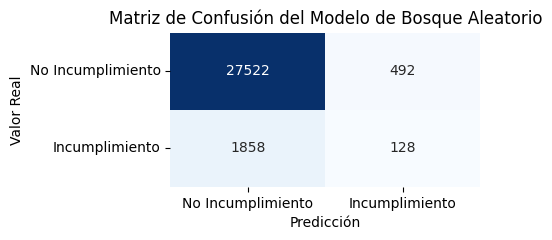

Área bajo la curva ROC (AUC-ROC) (con datos originales): 0.5234442554294714


In [63]:
#Entrenar modelo con datos originales
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Paso 2: Instanciar un RandomForestClassifier (usando valores predeterminados por ahora)
rf_model = RandomForestClassifier(random_state=123)

# Paso 3: Entrenar el modelo con los datos originales
rf_model.fit(X_train, y_train)

# Paso 4: Evaluar el rendimiento del modelo
y_pred_rf = rf_model.predict(X_test)
print("Informe de clasificación del modelo de Bosque Aleatorio (con datos originales):")
print(classification_report(y_test, y_pred_rf))

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy del modelo de Bosque Aleatorio con datos Originales:", accuracy)

#Matriz de confusión
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Bosque Aleatorio')
plt.show()

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_rf)
print("Área bajo la curva ROC (AUC-ROC) (con datos originales):", auc_roc)


Informe de clasificación del modelo de Bosque Aleatorio:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81     28014
           1       0.14      0.69      0.23      1986

    accuracy                           0.70     30000
   macro avg       0.56      0.69      0.52     30000
weighted avg       0.91      0.70      0.78     30000

Accuracy del modelo de Bosque Aleatorio con undersampling: 0.7013


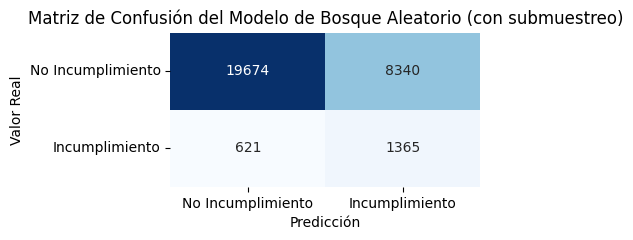

Área bajo la curva ROC (AUC-ROC): 0.6948014447674739


In [64]:
#Modelo con datos de UNDERSAMPLING

# Paso 2: Instanciar un RandomForestClassifier (usando valores predeterminados por ahora)
model2 = RandomForestClassifier(random_state=123)

# Paso 3: Entrenar el modelo
model2.fit(X_train_downsampled, y_train_downsampled)

# Paso 4: Evaluar el rendimiento del modelo
y_pred_rf = model2.predict(X_test)
print("Informe de clasificación del modelo de Bosque Aleatorio:")
print(classification_report(y_test, y_pred_rf))

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy del modelo de Bosque Aleatorio con undersampling:", accuracy)

#Matriz de confusión para el modelo con los datos Undersampling
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Bosque Aleatorio (con submuestreo)')
plt.show()

# Calcular el AUC-ROC
auc_roc = roc_auc_score(y_test, y_pred_rf)
print("Área bajo la curva ROC (AUC-ROC):", auc_roc)


Informe de clasificación del modelo de Bosque Aleatorio (con SMOTE):
              precision    recall  f1-score   support

           0       0.95      0.80      0.87     28014
           1       0.14      0.45      0.21      1986

    accuracy                           0.78     30000
   macro avg       0.55      0.62      0.54     30000
weighted avg       0.90      0.78      0.83     30000

Accuracy del modelo de Bosque Aleatorio con SMOTE: 0.7774666666666666


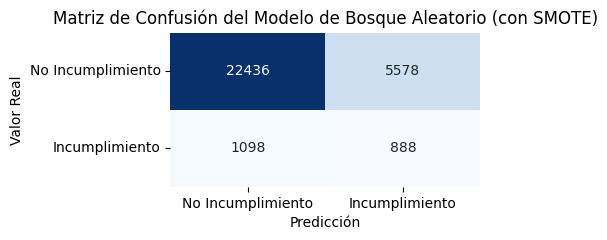

In [65]:
from imblearn.over_sampling import SMOTE

# Paso 1: Importar SMOTE
from imblearn.over_sampling import SMOTE

# Paso 2: Instanciar un objeto SMOTE
smote = SMOTE(random_state=123)

# Paso 3: Aplicar SMOTE al conjunto de datos de entrenamiento
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Paso 4: Entrenar el modelo con los datos sobremuestreados
rf_model_smote = RandomForestClassifier(random_state=123)
rf_model_smote.fit(X_train_smote, y_train_smote)

# Paso 5: Evaluar el rendimiento del modelo
y_pred_rf_smote = rf_model_smote.predict(X_test)
print("Informe de clasificación del modelo de Bosque Aleatorio (con SMOTE):")
print(classification_report(y_test, y_pred_rf_smote))

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred_rf_smote)
print("Accuracy del modelo de Bosque Aleatorio con SMOTE:", accuracy)

# Paso 6: Mostrar la matriz de confusión
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Bosque Aleatorio (con SMOTE)')
plt.show()


In [69]:
Tabla = pd.DataFrame({ 'Balanceo':['Original', 'Under', 'SMOTE'],
                      'Accuracy': [0.92, 0.70, 0.78],
                       'Recall': [0.98, 0.70, 0.80],
                       'Precisión': [0.94, 0.97, 0.95]})

In [70]:
Tabla

,Balanceo,Accuracy,Recall,Precisión
0,Original,0.92,0.98,0.94
1,Under,0.70,0.70,0.97
2,SMOTE,0.78,0.80,0.95


La técnica que vamos a utilizar para el modelo, según los valores de Accuraccy, Recall y Precisión:
**SMOTE**

Informe de clasificación del modelo de Regresión Logística:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     28014
           1       0.17      0.71      0.27      1986

    accuracy                           0.75     30000
   macro avg       0.57      0.73      0.56     30000
weighted avg       0.92      0.75      0.81     30000

Accuracy del modelo de Regresión Logística: 0.7481333333333333


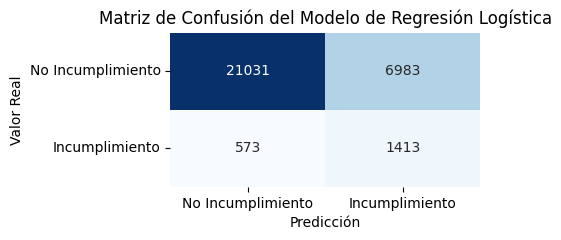

In [71]:
#UTILIZANDO EL ALGORITMO DE REGRESIÓN LOGÍSTICA PARA PROBAR NUESTRO MODELO utilizando los datos balanceados de SMOTE
from sklearn.linear_model import LogisticRegression

# Paso 1: Instanciar el modelo de regresión logística
logistic_model = LogisticRegression(random_state=123)

# Paso 2: Entrenar el modelo con los datos de entrenamiento balanceados (SMOTE)
logistic_model.fit(X_train_smote, y_train_smote)

# Paso 3: Hacer predicciones en el conjunto de prueba
y_pred_logistic = logistic_model.predict(X_test)

# Paso 4: Evaluar el rendimiento del modelo
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Imprimir el informe de clasificación
print("Informe de clasificación del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_logistic))

# Calcular y mostrar el accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy del modelo de Regresión Logística:", accuracy_logistic)

# Mostrar la matriz de confusión
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo de Regresión Logística')
plt.show()


Informe de clasificación del modelo XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.75      0.85     28014
           1       0.16      0.68      0.26      1986

    accuracy                           0.75     30000
   macro avg       0.57      0.72      0.55     30000
weighted avg       0.92      0.75      0.81     30000

Accuracy del modelo XGBoost: 0.7456666666666667


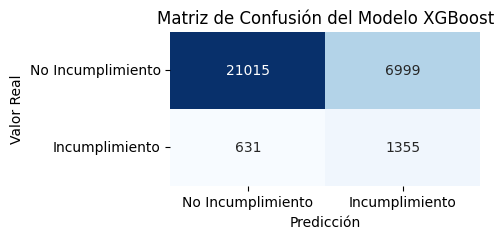

In [72]:
#UTILIZANDO EL ALGORITMO DE XGBOOST PARA PROBAR NUESTRO MODELO utilizando los datos balanceados de SMOTE
from xgboost import XGBClassifier

# Paso 1: Instanciar el modelo XGBoost
xgb_model = XGBClassifier(random_state=123)

# Paso 2: Entrenar el modelo con los datos de entrenamiento balanceados (SMOTE)
xgb_model.fit(X_train_smote, y_train_smote)

# Paso 3: Hacer predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Paso 4: Evaluar el rendimiento del modelo

# Imprimir el informe de clasificación
print("Informe de clasificación del modelo XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Calcular y mostrar el accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy del modelo XGBoost:", accuracy_xgb)

# Mostrar la matriz de confusión
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Incumplimiento', 'Incumplimiento'],
            yticklabels=['No Incumplimiento', 'Incumplimiento'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión del Modelo XGBoost')
plt.show()


En el Random Forest con SMOTE, su recall es ligeramente superior al de los otros dos modelos: Regresión Logística y XGBoost. Esto sugiere que tiene una mejor capacidad para detectar casos de incumplimiento en comparación con los otros modelos en este conjunto de datos y configuración específicos.

De igual forma, su accuracy es ligeramente más alto al de los otros modelos.



**La métrica más importante es la sensibilidad (recall).**

La sensibilidad es particularmente relevante en este contexto porque nos interesa minimizar los falsos negativos, es decir, queremos identificar correctamente a aquellos clientes que están en riesgo de incumplir con sus pagos. Un falso negativo en este caso podría significar aprobar un préstamo a un cliente que eventualmente incumplirá, lo que podría tener consecuencias financieras negativas para el banco, como pérdida de capital o costos adicionales de recuperación.

**Conclusiones**
* Maximizar la sensibilidad ayudará a garantizar que el banco pueda tomar medidas preventivas adecuadas para mitigar el riesgo de incumplimiento y proteger sus intereses financieros.
* Priorizar a personas mayores:ya que tienden a tener una menor propensión al incumplimiento en comparación con los jóvenes.
* Establecer un límite máximo para evaluar la proporción de deuda con respecto al ingreso y priorizar a los clientes cuya proporción esté por debajo de este límite.
* Considerar el historial crediticio: Los clientes con un historial crediticio positivo y sin registros de incumplimiento pueden ser considerados como menos riesgosos y, por lo tanto, podrían ser candidatos preferidos para la aprobación de créditos.
* Establecer un límite máximo para la cantidad de productos financieros en deuda que un cliente puede tener antes de aprobar un crédito.
* Es importante realizar un monitoreo continuo del desempeño de los clientes una vez que se les ha aprobado un crédito.